**Исследовательский анализ данных по видеоиграм**

**Цель исследования:** выявить закономерности, определяющие успешность игры

**Описание данных:**

- Name — название игры

- Platform — платформа

- Year_of_Release — год выпуска

- Genre — жанр игры

- NA_sales — продажи в Северной Америке (миллионы проданных копий)

- EU_sales — продажи в Европе (миллионы проданных копий)

- JP_sales — продажи в Японии (миллионы проданных копий)

- Other_sales — продажи в других странах (миллионы проданных копий)

- Critic_Score — оценка критиков (максимум 100)

- User_Score — оценка пользователей (максимум 10)

- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Краткое описание шагов:**
1. Изучение общей информации по датасету
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Итоговый вывод

Изучение общей информации по датасету

In [1]:
# загружаем библиотеки, которые нам могут понадобиться в ходе исследования

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")
from scipy import stats as st

In [2]:
# читаем файл с данными 

import os

pth1 = '/datasets/games.csv'
pth2 = 'C:/Users/Lena/Github/datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong') 

In [3]:
# выводим строчки df, изучаем содержание и название столбцов

df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2807,NHL 11,X360,2010.0,Sports,0.61,0.07,0.00,0.05,88.0,7.7,E10+
11239,Savage Skies,PS2,2002.0,Shooter,0.04,0.03,0.00,0.01,56.0,tbd,M
3913,Naruto Shippuden: Clash of Ninja Revolution 3,Wii,2009.0,Fighting,0.44,0.03,0.00,0.04,74.0,8.1,T
14998,ZooCube,GC,2002.0,Puzzle,0.02,0.00,0.00,0.00,67.0,6.1,E
15118,Rugby League Live 3,X360,2015.0,Action,0.00,0.02,0.00,0.00,NaN,7,E
14127,My Hero Academia: Battle for All,3DS,2016.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13444,March of the Penguins,DS,2006.0,Adventure,0.04,0.00,0.00,0.00,34.0,1.7,E
15011,My Animal Centre,Wii,2009.0,Simulation,0.00,0.02,0.00,0.00,NaN,NaN,NaN
16478,Cartoon Network Battle Crashers,3DS,2016.0,Action,0.01,0.00,0.00,0.00,NaN,tbd,E10+
10279,Pimp My Ride,X360,2006.0,Racing,0.10,0.00,0.00,0.01,38.0,3.8,T


In [4]:
# проверяем правильное написание столбцов и на предмет пропущенных значений

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# используем метод для большей наглядности по количеству пропущенных значений

df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод**

1. некорректное название столбцов. Необходимо привести к змеиному регистру.
2. некорректные типы данных (year_of_release, sales, score), необходимо исправить на float/int.
3. по пропущенным значениям:
- по 2 пропущенных значения в столбцах name и genre (нужно проверить, возможно в одних и тех же строках);
- также количество пропусков примерно одинаковое в столбцах user_score и rating;
- есть пропуски в столбце year_of_release и critic_score (более 50%!)
Предполагаю, что пропуски связаны с техническими ошибками. Например, при выгрузке, объединении данных (в столбцах user_score и rating количество пропусков практически одинаковое)
Какие пропуски и в каких столбцах заполнять, на какой тип данных изменять значения в столбцах, примем решение на следующем шаге, в зависимости от того, как будем использовать данные в этих столбцах.
  

### Предобработка данных

In [6]:
# посмотрим на название всех столбцов

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# приведем название столбцов к правильному виду

df.columns = df.columns.str.lower()

In [9]:
# проверяем результат операции

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Исследуем каждый столбец отдельно на предмет:
    
- адекватных и аномальных значений;
- пропусков;
- неподходящих типов данных. 

#### name

In [10]:
# посмотрим на значения в столбце

df['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [11]:
# приведем все буквы к нижнему регистру

df['name'] = df['name'].str.lower()

In [12]:
# проверим

df['name'].value_counts()

need for speed: most wanted                         12
ratatouille                                          9
lego marvel super heroes                             9
fifa 14                                              9
madden nfl 07                                        9
                                                    ..
jewels of the tropical lost island                   1
sherlock holmes and the mystery of osborne house     1
the king of fighters '95 (cd)                        1
megamind: mega team unite                            1
haitaka no psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [13]:
# проверим предположение, что пропущенные значения в name и genre находятся в одних и тех же строках

df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# проверим, много ли различных названий

df['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)


По столбцу name:
    
1. тип данных - object;
    
2. привели все буквы в столбце к нижнему регистру;
    
3. в столбце очень много различных названий игр;
    
4. два пропуска - по технической причине

#### platform

In [15]:
# приведем все буквы к нижнему регистру

df['platform'] = df['platform'].str.lower()

In [16]:
# посмотрим на данные в столбце

df['platform'].value_counts()

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       29
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

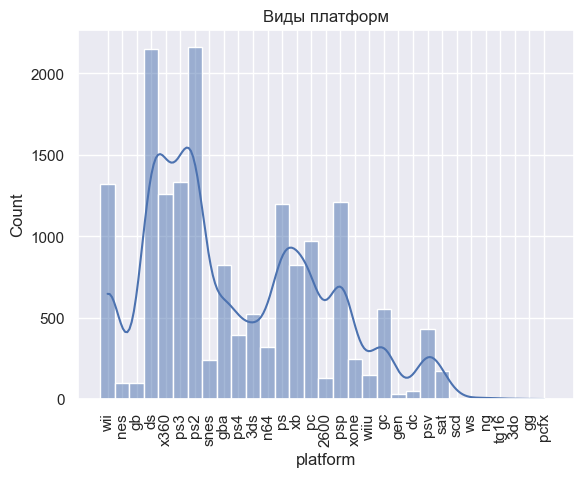

In [17]:
# посмотрим на график

sns.histplot(data=df, x='platform', kde=True, bins=31).set_title('Виды платформ')
plt.xticks(rotation=90)
plt.show()


По столбцу platform:
    
1. тип данных - object;
    
2. привели все буквы в столбце к нижнему регистру;
    
3. наиболее популярные платформы - ps2 и ds, наименее популярные gg и pcfx;
    
4. пропусков нет

#### year_of_release

In [18]:
# посмотрим на данные в столбце

df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [19]:
# используем метод describe() для исследования столбца

df['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [20]:
# поменяем тип данных с object на float, т.к. годы должны быть выражены в числах

df['year_of_release'] = df['year_of_release'].astype(float)
df['year_of_release'] = df['year_of_release'].astype('Int64')

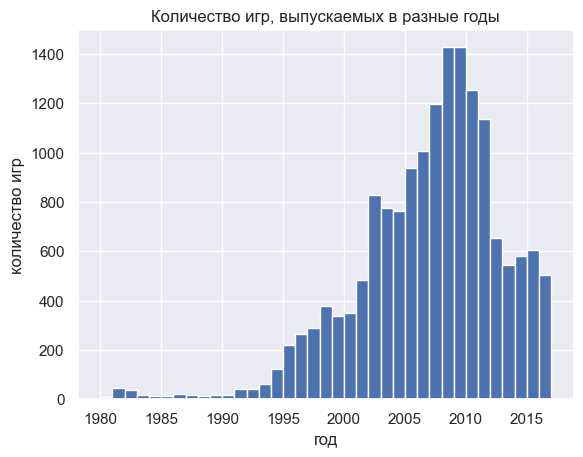

In [21]:
# посмотрим на график

df['year_of_release'].hist(bins=37, range=(1980, 2017))
plt.xlabel('год')
plt.ylabel('количество игр')
plt.title('Количество игр, выпускаемых в разные годы')
plt.show()


По столбцу year_of_release:
    
1. тип данных - изменили на float, т.к. годы должны быть выражены в числах;
    
2. пиковые года выпуска - 2008-2009 гг
    
3. пропуски оставляем без изменений

#### genre

In [22]:
# приведем все буквы к нижнему регистру

df['genre'] = df['genre'].str.lower()

In [23]:
# посмотрим на данные в столбце

df['genre'].value_counts()

action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64

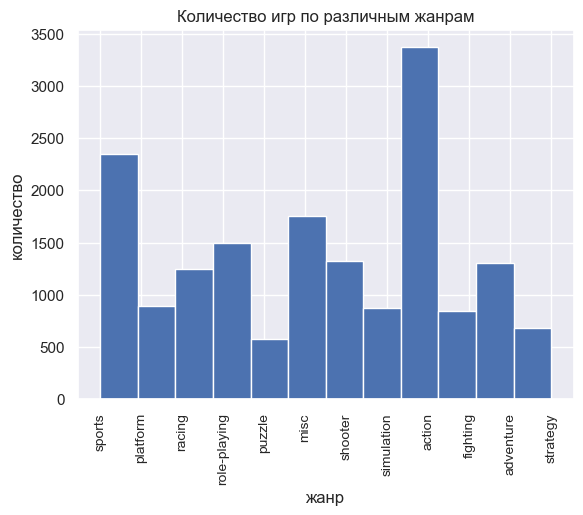

In [24]:
# посмотрим на график

df['genre'].hist(bins=12)
plt.title('Количество игр по различным жанрам')
plt.xlabel('жанр')
plt.ylabel('количество')
plt.xticks(fontsize=10, rotation=90)
plt.show()


По столбцу genre:
    
1. тип данных - object;
    
2. наиболее популярные жанры action и sports, менее популярные puzzle
    
3. пропуска 2 (как мы предположили выше, технического характера)

#### na_sales

In [25]:
# поменяем тип данных с object на float, т.к. продажы должны быть выражены в числах

df['na_sales'] = df['na_sales'].astype(float)

In [26]:
# используем метод describe() для исследования столбца

df['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [27]:
# найдем медианное значение по столбцу

df['na_sales'].median()

0.08

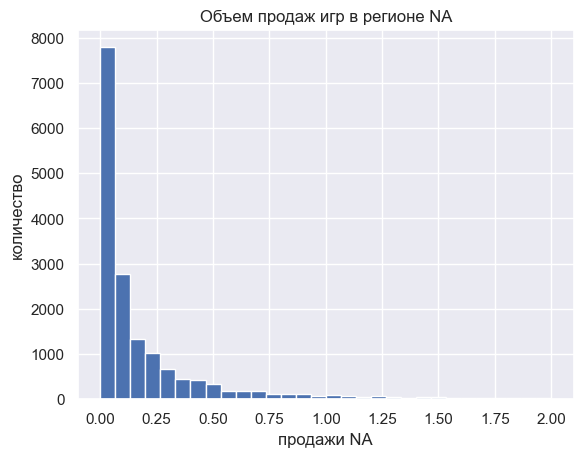

In [28]:
df['na_sales'].hist(bins=30, range=(0, 2))
plt.title('Объем продаж игр в регионе NA')
plt.xlabel('продажи NA')
plt.ylabel('количество')
plt.show()

In [29]:
# посмотрим на max значения

df['na_sales'].sort_values(ascending=False)

0        41.36
1        29.08
9        26.93
5        23.20
2        15.68
         ...  
11730     0.00
11729     0.00
11718     0.00
11715     0.00
16714     0.00
Name: na_sales, Length: 16715, dtype: float64

In [30]:
# посмотрим на несколько строк с max значением

df.loc[0]

name               wii sports
platform                  wii
year_of_release          2006
genre                  sports
na_sales                41.36
eu_sales                28.96
jp_sales                 3.77
other_sales              8.45
critic_score             76.0
user_score                  8
rating                      E
Name: 0, dtype: object

In [31]:
# посмотрим на несколько строк с max значением

df.loc[1]

name               super mario bros.
platform                         nes
year_of_release                 1985
genre                       platform
na_sales                       29.08
eu_sales                        3.58
jp_sales                        6.81
other_sales                     0.77
critic_score                     NaN
user_score                       NaN
rating                           NaN
Name: 1, dtype: object


По столбцу na_sales:
    
1. тип данных - изменили на float, т.к. продажи должны быть выражены в числах;
    
2. в продажах большой разброс в значениях (среднее 0.26, медиана 0.08); много нулевых продаж;

3. max значение - 41.36 wii sports, 2006 год;
        
4. пропусков нет.

#### eu_sales

In [32]:
# поменяем тип данных с object на float, т.к. продажы должны быть выражены в числах

df['eu_sales'] = df['eu_sales'].astype(float)

In [33]:
# используем метод describe() для исследования столбца

df['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [34]:
# найдем медианное значение по столбцу

df['eu_sales'].median()

0.02

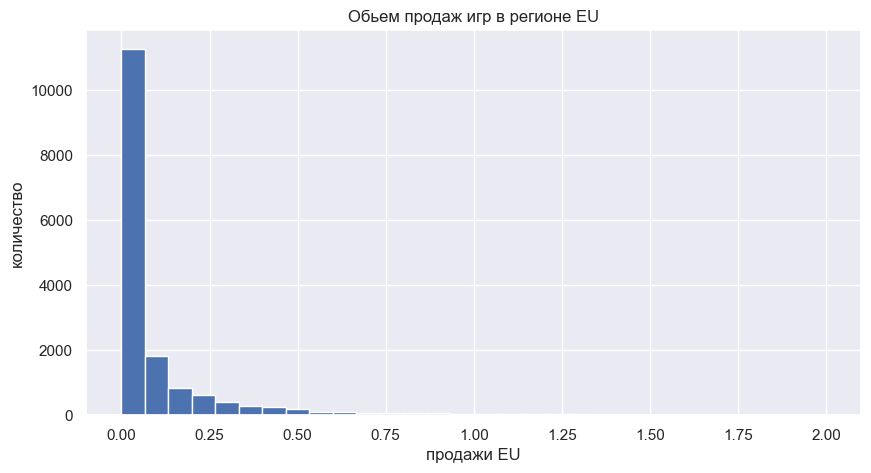

In [140]:
# построим график

df['eu_sales'].hist(bins=30, range=(0, 2))
plt.title('Обьем продаж игр в регионе EU')
plt.xlabel('продажи EU')
plt.ylabel('количество')
plt.show()

In [36]:
# посмотрим на max значения

df['eu_sales'].sort_values(ascending=False)

0        28.96
2        12.76
10       10.95
3        10.93
19        9.20
         ...  
11018     0.00
2715      0.00
11016     0.00
11013     0.00
16714     0.00
Name: eu_sales, Length: 16715, dtype: float64

In [37]:
# посмотрим на строку с max значением

df.loc[0]

name               wii sports
platform                  wii
year_of_release          2006
genre                  sports
na_sales                41.36
eu_sales                28.96
jp_sales                 3.77
other_sales              8.45
critic_score             76.0
user_score                  8
rating                      E
Name: 0, dtype: object


По столбцу eu_sales:
    
1. тип данных - изменили на float, т.к. продажи должны быть выражены в числах;
    
2. в продажах тоже значительный разброс в значениях (среднее 0.14, медиана 0.02); много нулевых продаж;
    
3. max значение - 28.96 wii sports, 2006 год;
        
4. пропусков нет.

#### jp_sales

In [38]:
# поменяем тип данных с object на float, т.к. продажы должны быть выражены в числах

df['jp_sales'] = df['jp_sales'].astype(float)

In [39]:
# используем метод describe() для исследования столбца

df['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [40]:
# найдем медианное значение по столбцу

df['jp_sales'].median()

0.0

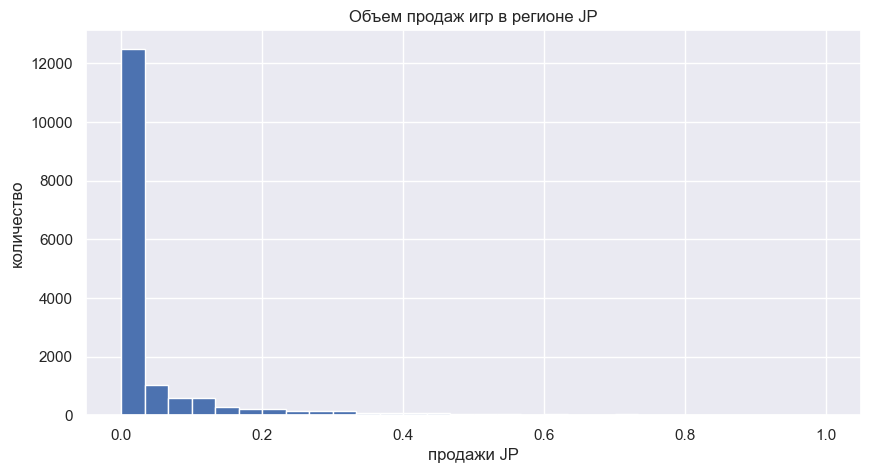

In [141]:
# построим график

df['jp_sales'].hist(bins=30, range=(0, 1))
plt.title('Объем продаж игр в регионе JP')
plt.xlabel('продажи JP')
plt.ylabel('количество')
plt.show()

In [42]:
# посмотрим на max значения

df['jp_sales'].sort_values(ascending=False)

4       10.22
12       7.20
1        6.81
6        6.50
20       6.04
        ...  
9542     0.00
4462     0.00
4460     0.00
4459     0.00
8357     0.00
Name: jp_sales, Length: 16715, dtype: float64

In [43]:
# посмотрим на строку с max значением

df.loc[4]

name               pokemon red/pokemon blue
platform                                 gb
year_of_release                        1996
genre                          role-playing
na_sales                              11.27
eu_sales                               8.89
jp_sales                              10.22
other_sales                             1.0
critic_score                            NaN
user_score                              NaN
rating                                  NaN
Name: 4, dtype: object


По столбцу jp_sales:
    
1. тип данных - изменили на float, т.к. продажи должны быть выражены в числах;
    
2. в продажах тоже значительный разброс в значениях (среднее 0.07, медиана 0.0); много нулевых продаж;
    
3. max значение - 10.22 pokemon red/pokemon blue, 1996 год;
        
4. пропусков нет.

#### other_sales

In [44]:
# поменяем тип данных с object на float, т.к. продажы должны быть выражены в числах

df['other_sales'] = df['other_sales'].astype(float)

In [45]:
# используем метод describe() для исследования столбца

df['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

In [46]:
# найдем медианное значение по столбцу

df['other_sales'].median()

0.01

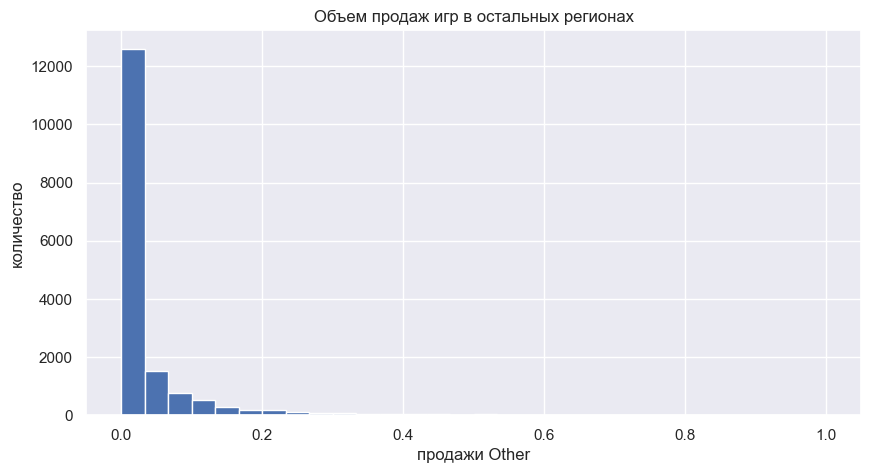

In [142]:
# построим график

df['other_sales'].hist(bins=30, range=(0, 1))
plt.title('Объем продаж игр в остальных регионах')
plt.xlabel('продажи Other')
plt.ylabel('количество')
plt.show()

In [48]:
# посмотрим на max значения

df['other_sales'].sort_values(ascending=False)

17       10.57
0         8.45
48        7.53
16        3.96
2         3.29
         ...  
11810     0.00
11808     0.00
11807     0.00
11804     0.00
16714     0.00
Name: other_sales, Length: 16715, dtype: float64

In [49]:
# посмотрим на строку с max значением

df.loc[17]

name               grand theft auto: san andreas
platform                                     ps2
year_of_release                             2004
genre                                     action
na_sales                                    9.43
eu_sales                                     0.4
jp_sales                                    0.41
other_sales                                10.57
critic_score                                95.0
user_score                                     9
rating                                         M
Name: 17, dtype: object


По столбцу other_sales:
    
1. тип данных - изменили на float, т.к. продажи должны быть выражены в числах;
    
2. в продажах не такой значительный разброс в значениях, как в предыдущих трех столбцах (среднее 0.04, медиана 0.01); много нулевых продаж;
    
3. max значение - 10.57 grand theft auto: san andreas, 2004 год;
        
4. пропусков нет.

#### critic_score

In [50]:
# поменяем тип данных с object на float, т.к. продажы должны быть выражены в числах

df['critic_score'] = df['critic_score'].astype(float)

In [51]:
# используем метод describe() для исследования столбца

df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [52]:
# найдем медианное значение по столбцу

df['critic_score'].median()

71.0

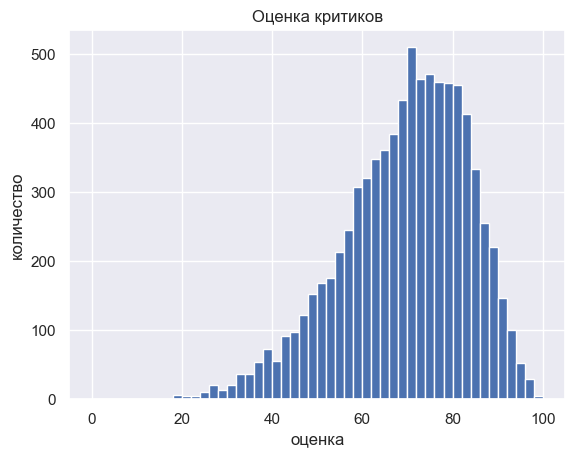

In [53]:
# посмотрим на график

df['critic_score'].hist(bins=50, range=(0, 100))
plt.xlabel('оценка')
plt.ylabel('количество')
plt.title('Оценка критиков')
plt.show()


In [54]:
# посмотрим на max значения

df['critic_score'].sort_values(ascending=False)

227      98.0
57       98.0
51       98.0
5350     98.0
165      97.0
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16715, dtype: float64

In [55]:
# посмотрим на строки с max значением

df.loc[227]

name               tony hawk's pro skater 2
platform                                 ps
year_of_release                        2000
genre                                sports
na_sales                               3.05
eu_sales                               1.41
jp_sales                               0.02
other_sales                             0.2
critic_score                           98.0
user_score                              7.7
rating                                    T
Name: 227, dtype: object

In [56]:
# посмотрим на строки с max значением

df.loc[57]

name               grand theft auto iv
platform                           ps3
year_of_release                   2008
genre                           action
na_sales                          4.76
eu_sales                          3.69
jp_sales                          0.44
other_sales                       1.61
critic_score                      98.0
user_score                         7.5
rating                               M
Name: 57, dtype: object

In [57]:
# посмотрим на строки с max значением

df.loc[51]

name               grand theft auto iv
platform                          x360
year_of_release                   2008
genre                           action
na_sales                          6.76
eu_sales                          3.07
jp_sales                          0.14
other_sales                       1.03
critic_score                      98.0
user_score                         7.9
rating                               M
Name: 51, dtype: object

In [58]:
# посмотрим на строки с max значением

df.loc[5350]

name               soulcalibur
platform                    dc
year_of_release           1999
genre                 fighting
na_sales                   0.0
eu_sales                   0.0
jp_sales                  0.34
other_sales                0.0
critic_score              98.0
user_score                 8.8
rating                       T
Name: 5350, dtype: object


По столбцу critic_score:
    
1. тип данных - изменили на float, т.к. оценка должна быть выражена в числах;
    
2. в оценках незначительный разброс в значениях (среднее 68.96, медиана 71.0);
    
3. max оценка - 98.0: tony hawk's pro skater 2 (2000), grand theft auto iv(2008, платформа ps3), grand theft auto iv(2008, платформа x360), soulcalibur(1999).
        
4. пропусков более 50% (8578), оставляем без изменения. Предполагаю, что техническая причина.

#### user_score

In [59]:
# посмотрим на все значения в столбце

df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [60]:
# заменим tbd на Nan

df['user_score'] = df['user_score'].str.replace('tbd','Nan')

In [61]:
# поменяем тип данных с object на float, т.к. продажы должны быть выражены в числах

df['user_score'] = df['user_score'].astype(float)

In [62]:
# используем метод describe() для исследования столбца

df['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [63]:
# найдем медианное значение по столбцу

df['user_score'].median()

7.5

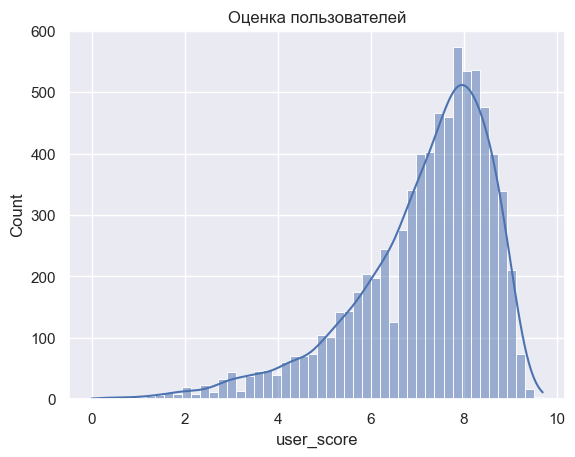

In [64]:
# посмотрим на график

sns.histplot(data=df, x='user_score', kde=True, bins=50).set_title('Оценка пользователей')
plt.show()

По столбцу user_score:
    
1. тип данных - изменили на float, т.к. оценка должна быть выражена в числах;
    
2. в оценках незначительный разброс в значениях (среднее 7.12, медиана 7.5); 
    
3. max оценка - 9.7;
        
4. в столбце было выявлено значение 'tbd' (to be determined), то есть информация по 2424 играм не определена, были заменены на Nan; 
    
5. пропусков в столбце достаточно много. Причина, предполагаю, техническая.

#### rating

In [65]:
# посмотрим на все значения в столбце

df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [66]:
# заменим пропуски в столбце rating на unknown

df['rating'].fillna('unknown', inplace=True)

In [67]:
# проверим, что получилось

df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [68]:
df['rating'].value_counts()

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

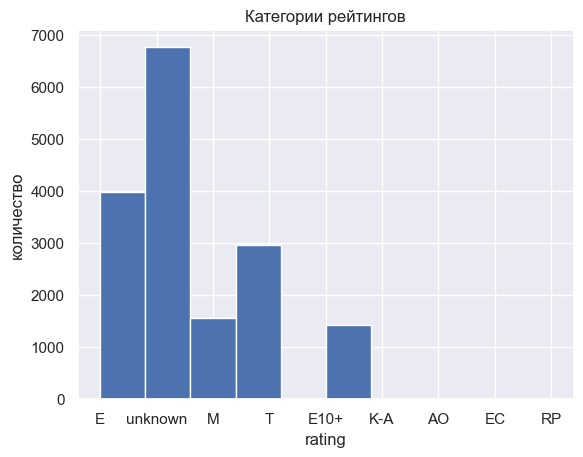

In [69]:
# построим график

df['rating'].hist()
plt.title('Категории рейтингов')
plt.xlabel('rating')
plt.ylabel('количество')
plt.show()


По столбцу rating:
    
1. тип данных - object;  
 
2. 8 различных возрастных категорий;
        
3. большинство игр имеют возрастную категорию Е(3990) и Т(2961); 
    
4. пропуски заменили на 'unknown'.

In [70]:
# проверяем df на дубликаты

df.duplicated().sum()

0

In [71]:
# добавляем столбец с суммарными продажвми во всех регионах

df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [72]:
# проверим

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38



**Вывод**
    
1. Типы данных
    
- были изменены на float типы данных в столбцах year_of_release, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score. 
Во-первых, должно быть соответствие между типом данных и содержанием столбца; во-вторых, это необходимо для построения графиков и выполнения дальнейшеших расчетов в исследовании;
    
2. Аномальные/адекватные значения
- в столбцах name, platform все буквы были приведены к нижнему регистру;
- в столбце user_score было обнаружено значение 'tbd', предполагаю тех. ошибка или описка, 'tbd' были заменены на Nan
    
3. Пропущенные значения
- были выявлены по два пропущенных значения в столбцах name и genre (в одинаковых строках), предполагаю тех. причина.
- много пропущенных значений в столбцах critic_score (более 50%), user_score и rating. Предполагаю, что причина также техническая.
- в столбце 'rating' заменили пропущенные значения на 'unknown'
- в остальных столбцах оставлялись без изменения, т.к. считаю правильным по минимуму заменять значения, чтобы не искажать первоначальные данные. 
    
4. Устранение дубликатов
- явные дубликаты не выявлены

### Исследовательский анализ данных

#### сколько игр выпускалось в разные годы

In [73]:
# используем метод value counts()

df['year_of_release'].value_counts().sort_values()

1980       9
1984      14
1985      14
1988      15
1987      16
1990      16
1983      17
1989      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      62
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: year_of_release, dtype: Int64

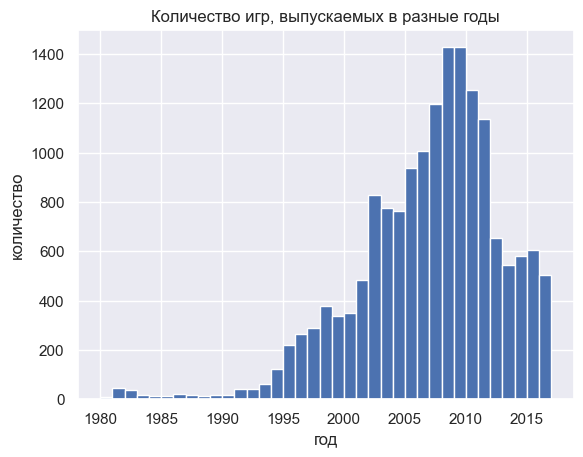

In [74]:
# посмотрим на график

df['year_of_release'].hist(bins=37, range=(1980, 2017))
plt.xlabel('год')
plt.ylabel('количество')
plt.title('Количество игр, выпускаемых в разные годы')
plt.show()


- с 1980 по 1993 количество выпускаемых игр минимально;
    
- с 1994 начинается заметный рост, достигая пика в 2008-2009 гг;
    
- с 2011 года резкое падение, практически в 2 раза, возможно связанное с насыщением рынка игр;

- с 2012 по 2016 - значения +/- на стабильном уровне.

#### как менялись продажи по платформам

In [75]:
# построим сводную таблицу зависимости продаж от платформы

table_a = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)
table_a

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


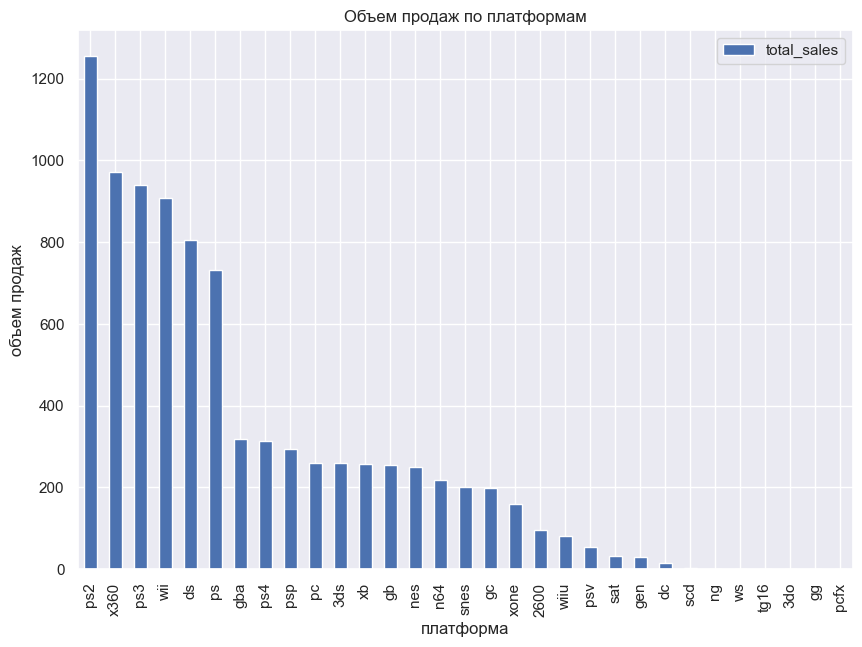

In [144]:
# посмотрим на график

table_a.plot(kind='bar', figsize=(10,7))
plt.title('Объем продаж по платформам')
plt.ylabel('объем продаж')
plt.xlabel('платформа')
plt.show()


Наибольшие суммарные продажи у 6-ти платформ: ps2, x360, ps3, wii, ds, ps.
    
У остальных платформ значительно меньше.

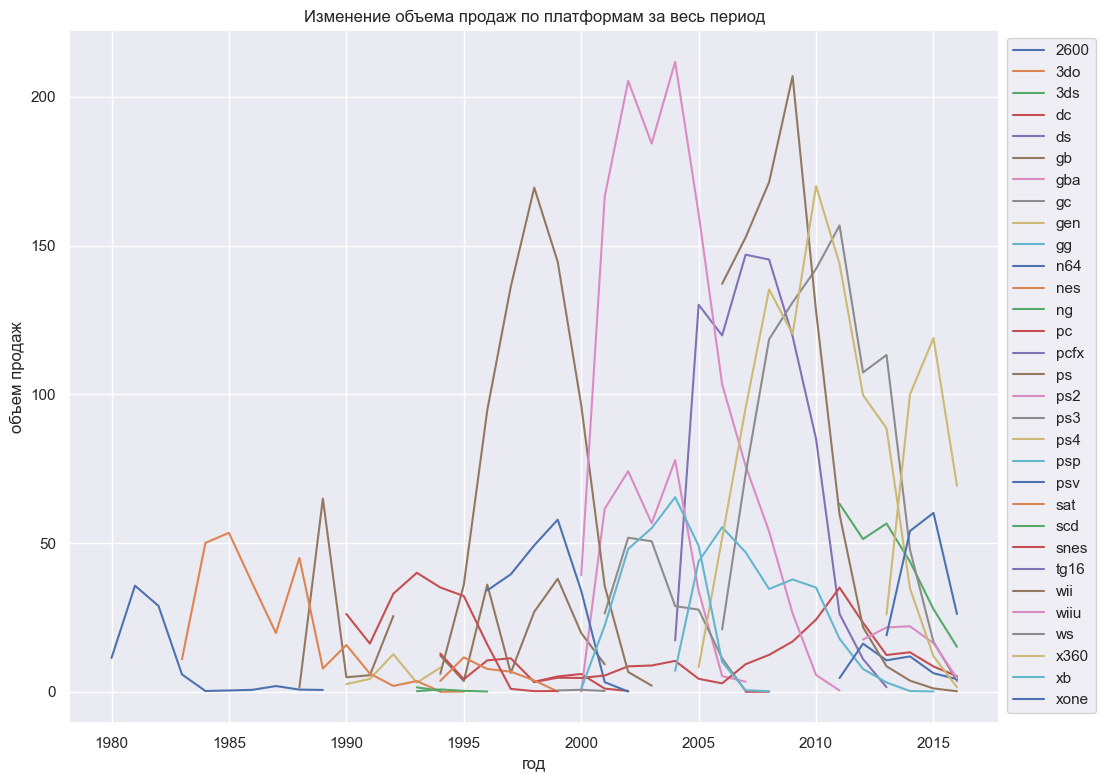

In [146]:
# построим сводную таблицу и график для всех платформ

table_b = df.pivot_table(index='year_of_release', columns='platform', values='total_sales',aggfunc=('sum'))
table_b.plot(figsize=(12, 9))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Изменение объема продаж по платформам за весь период')
plt.ylabel('объем продаж')
plt.xlabel('год')
plt.show()



У большинства платфоррм жизненный цикл примерно одинаковый +/-

In [78]:
# посмотрим на жизненный цикл 6-ти платформ с максимальными продажами

top_6_platforms_list = ['ps2','x360','ps3', 'wii', 'ds', 'ps']

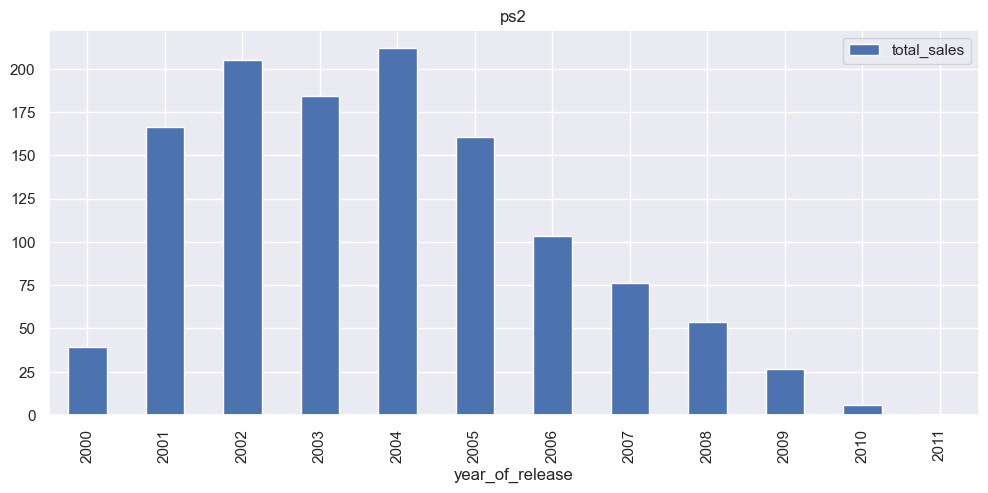

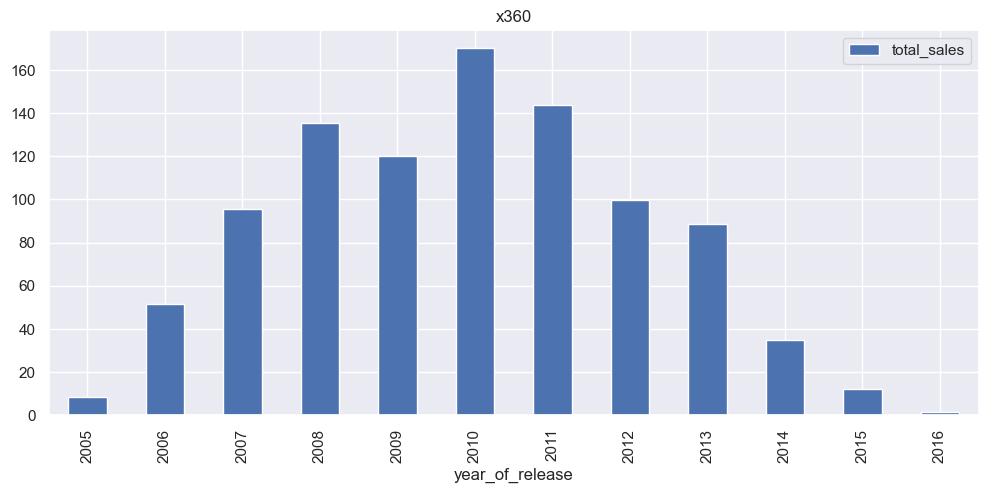

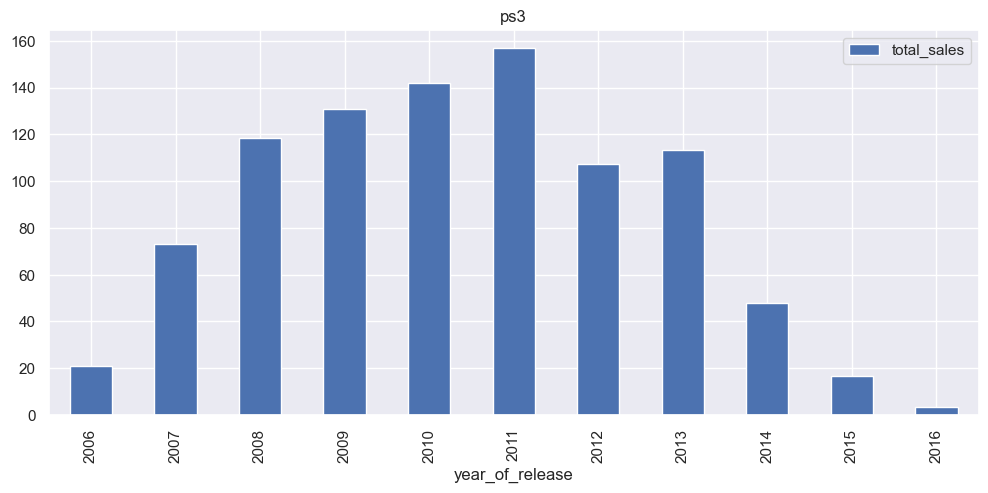

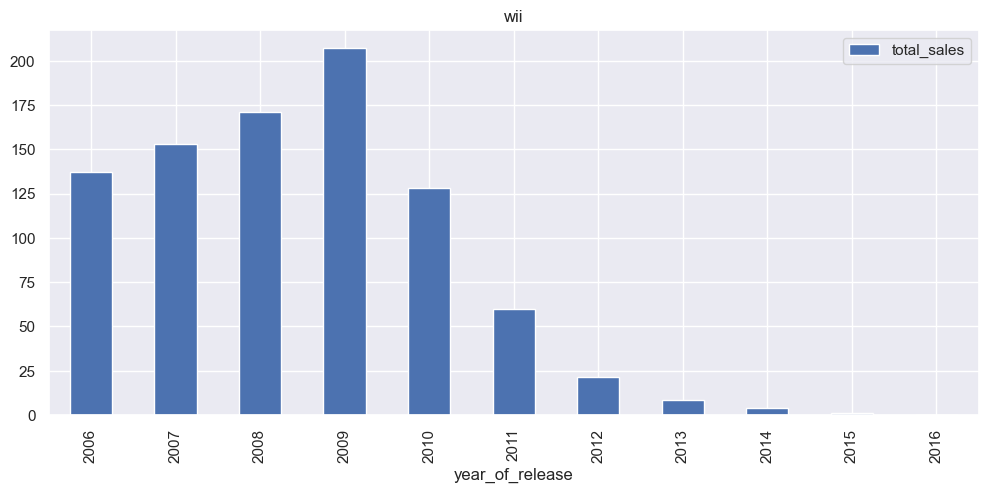

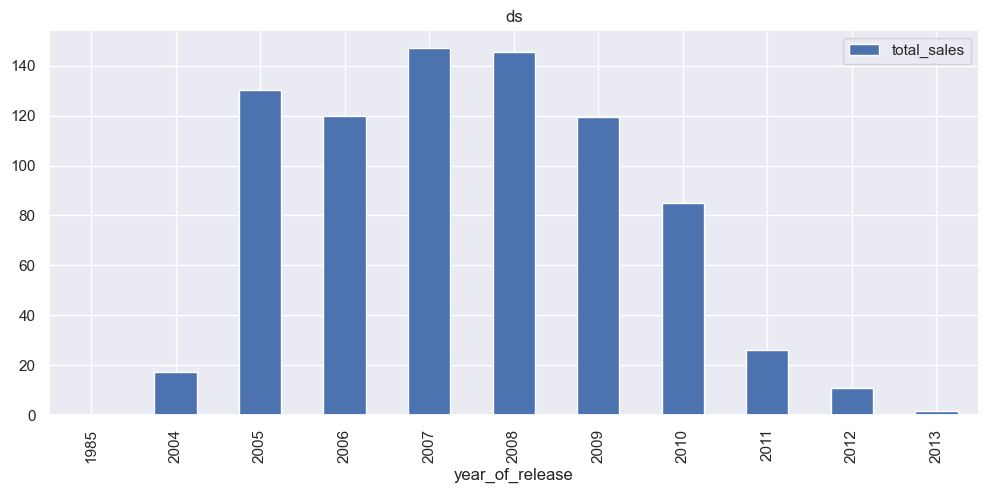

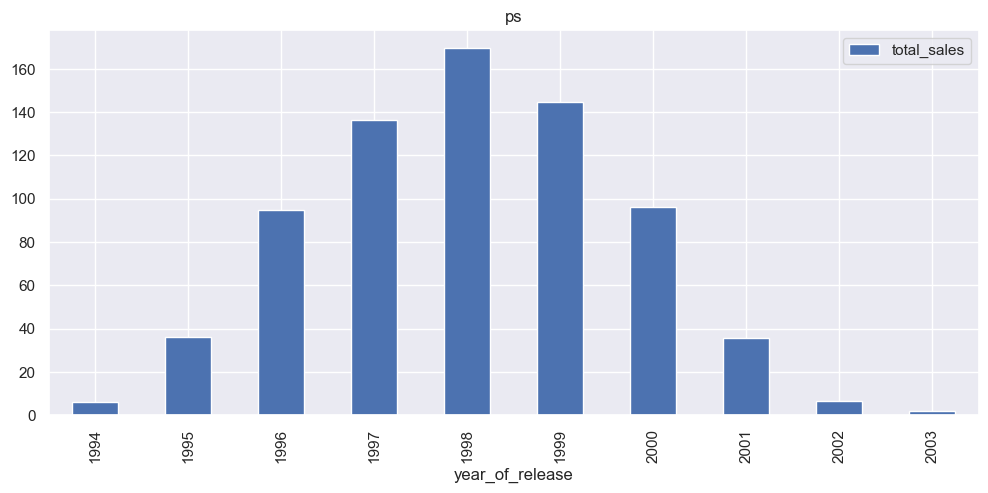

In [79]:
# построим графики по 6-ти платформам

for platform in top_6_platforms_list:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(12,5))
    plt.title(platform)


Если говорить о топовых платформах с максимальными продажами, то их жизненный цикл составляет примерно 11-12 лет.
Далее жизненный цикл сокращается.

#### определяем актуальный и предыдущий периоды


Так как мы установили, что примерный жизненный цикл топовых платформ составляет 11-12 лет:
    
- от 2 до 5 лет, чтобы достигнуть пика;
- и где-то 5 лет до "заката".

Для построения прогнозов, предполагаю, будет достаточно взять последние 5 лет. Таким образом мы "захватим" разные игры, которые за эти 5 лет пройдут разные этапы жизненного цикла.
То есть актуальным будем считать период с 2012 года.

#### какие платформы лидируют по продажам, растут или падают

In [80]:
# посмотрим на платформы с 2012 по 2016 гг

actual_platforms = df[df['year_of_release'] >= 2012]
actual_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [81]:
# посмотрим на сводную таблицу 

table_с = actual_platforms.pivot_table(\
        index='year_of_release', columns='platform', values='total_sales', aggfunc=('sum'))
table_с

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


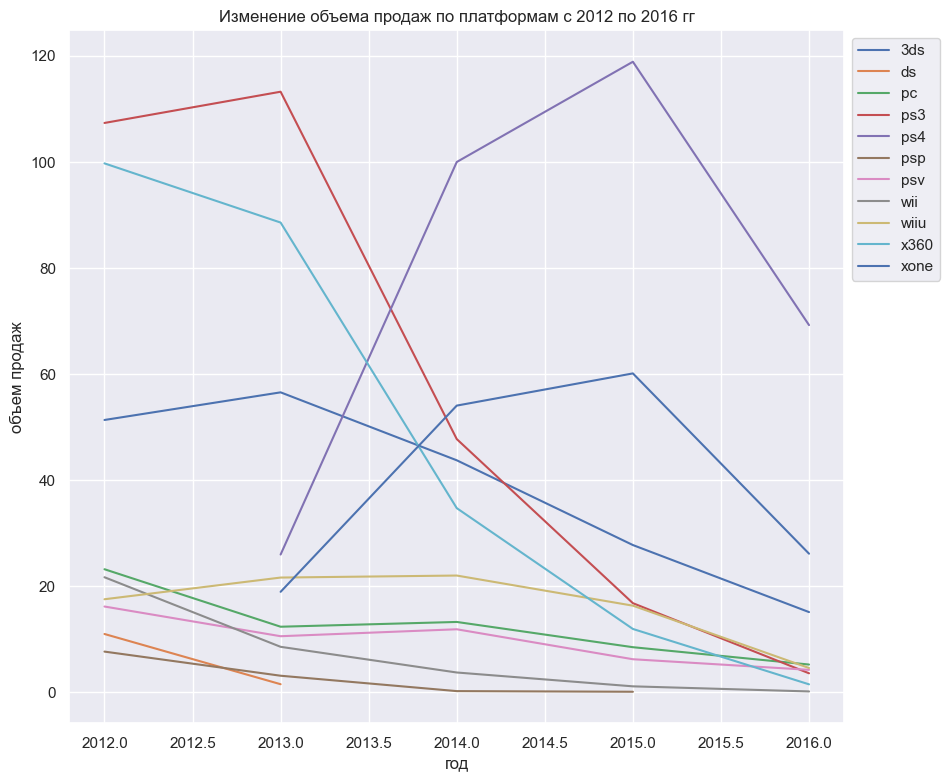

In [147]:
# построим график 

table_с.plot(figsize=(10, 9))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Изменение объема продаж по платформам с 2012 по 2016 гг')
plt.ylabel('объем продаж')
plt.xlabel('год')
plt.show()


    
- лидируют по продажам на 2016 год (данные за 2016 год неполные) ps4 и xone;
- у всех 11 платформ тренд по продажам нисходящий.

#### строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [83]:
# построим сводную таблицу

table_d = actual_platforms.groupby('platform')['total_sales'].describe()
table_d

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
ds,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
pc,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
ps3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
ps4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
psp,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
psv,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
wiiu,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


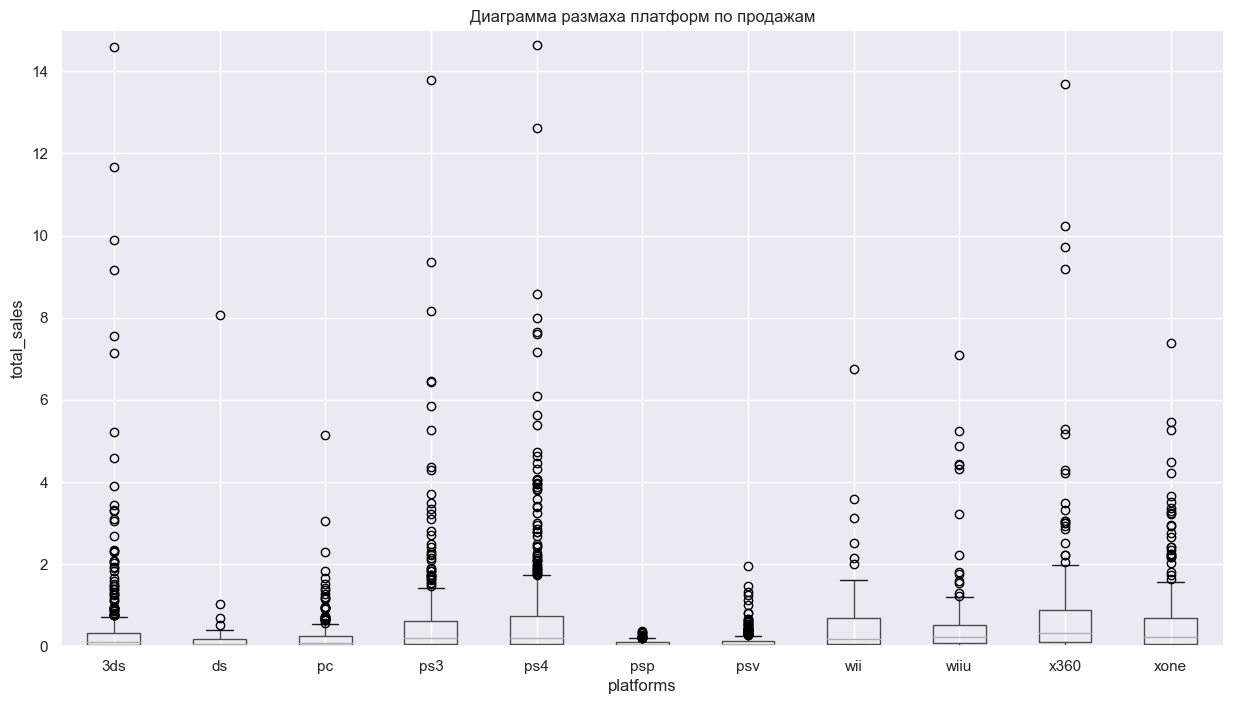

In [84]:
# строим диаграмму размаха продаж в разбивке по платформам

actual_platforms.pivot_table(index='name', columns='platform', values='total_sales').boxplot(figsize =(15, 8))
plt.ylabel('total_sales')
plt.xlabel('platforms')
plt.ylim(0,15)
plt.title('Диаграмма размаха платформ по продажам')
plt.show()



Диаграмма размаха показывает как распределены данные по продажам на разных платформах, выбросы.
- самый большой разброс у x360 и ps4;
- самое большое значение медианы у x360 (0.31), далее wiiu и xone (0.22), замыкают пятерку ps3 и ps4 (0.2);
- max значение у ps3 - 21.05;
- медиана и среднее значительно отличаются у всех платформ;
- у всех диаграмм медиана расположена ближе к Q1, чем к Q3.


#### строим диаграмму рассеяния и смотрим на корреляцию между отзывами и продажами

In [85]:
# на 2016 год у нас две наиболее популярные платформы ps4 и xone, возьмем xone

xone = actual_platforms[actual_platforms['platform']=='xone']

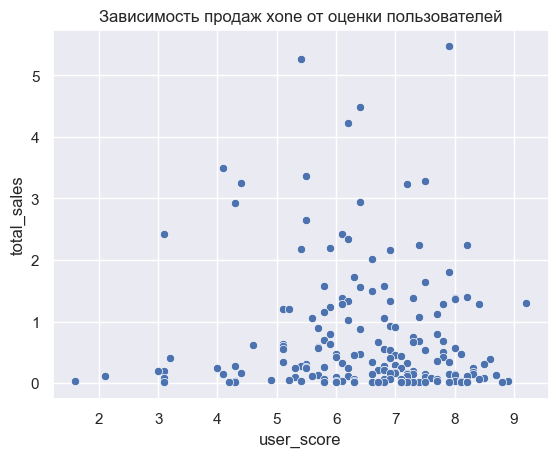

In [86]:
# посмотрим на зависимость user_score и total_sales

sns.scatterplot(x='user_score', y='total_sales', data=xone).set_title('Зависимость продаж xone от оценки пользователей')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

In [87]:
# посмотрим на корреляцию в цифровом выражении

xone['user_score'].corr(xone['total_sales'])

-0.0689250532827942

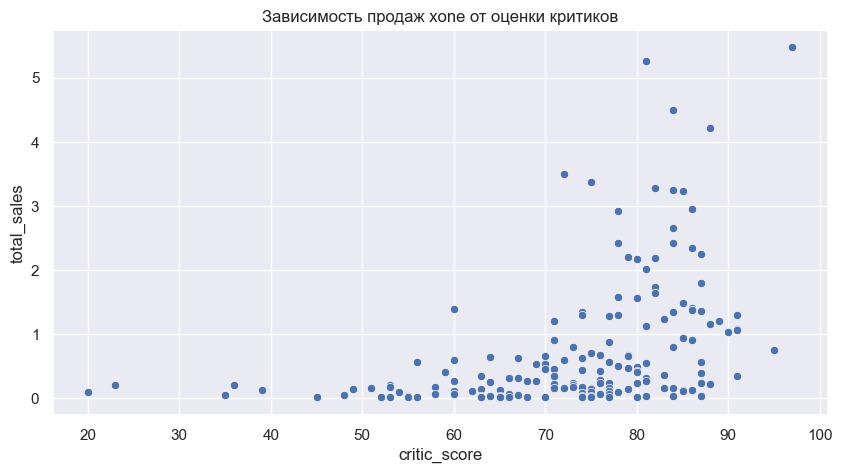

In [88]:
# посмотрим на зависимость critic_score и total_sales

sns.scatterplot(x='critic_score', y='total_sales', data=xone).set_title('Зависимость продаж xone от оценки критиков')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

In [89]:
# посмотрим на корреляцию в цифровом выражении

xone['critic_score'].corr(xone['total_sales'])

0.4169983280084016



- очень слабая отрицательная зависимость продаж от оценки пользователей;
- есть незначительная зависимость продаж от оценки критиков.
   

#### соотносим выводы с продажами игр на других платформах

In [90]:
# посмотрим на корреляцию на платформах из топ-5 по актуальному периоду: 'ps4','3ds','pc', 'wiiu'

In [91]:
# фильтруем нужную платформу

ps4 = actual_platforms[actual_platforms['platform'] == 'ps4']

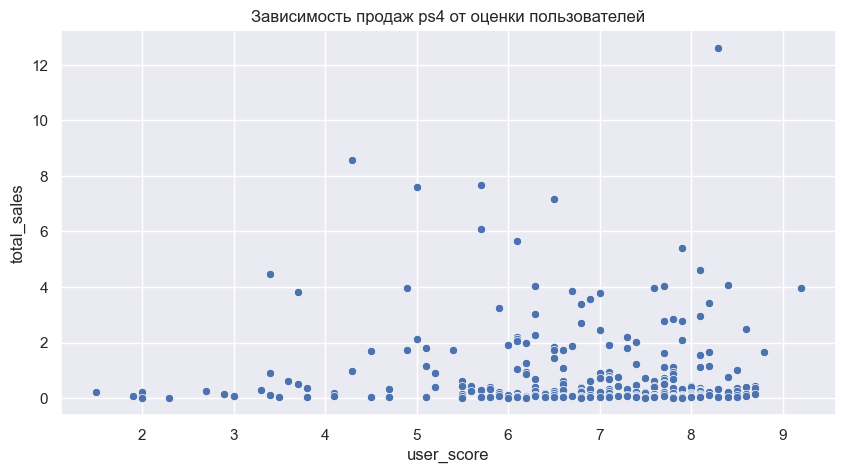

In [92]:
# посмотрим на зависимость user_score и total_sales

sns.scatterplot(x='user_score', y='total_sales', data=ps4).set_title('Зависимость продаж ps4 от оценки пользователей')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

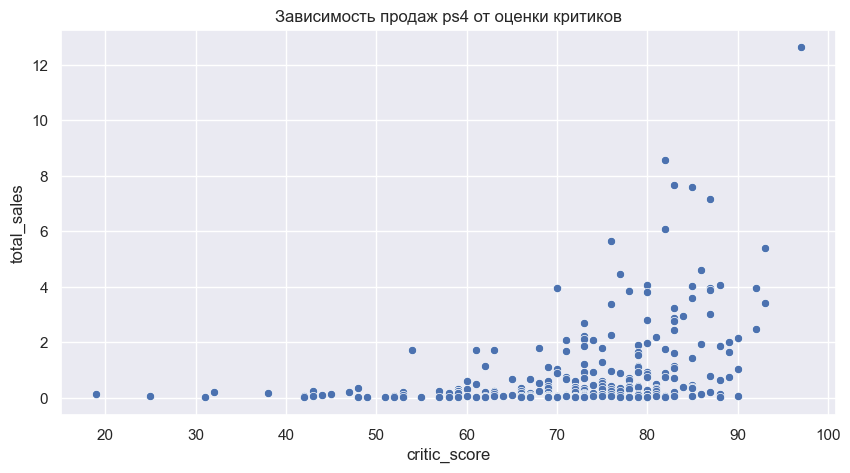

In [93]:
# посмотрим на зависимость critic_score и total_sales

sns.scatterplot(x='critic_score', y='total_sales', data=ps4).set_title('Зависимость продаж ps4 от оценки критиков')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

In [94]:
# посмотрим на корреляцию в цифровом выражении

ps4['user_score'].corr(ps4['total_sales'])

-0.03195711020455646

In [95]:
# посмотрим на корреляцию в цифровом выражении

ps4['critic_score'].corr(ps4['total_sales'])

0.40656790206178145

In [96]:
# фильтруем нужную платформу

ds3 = actual_platforms[actual_platforms['platform'] == '3ds']

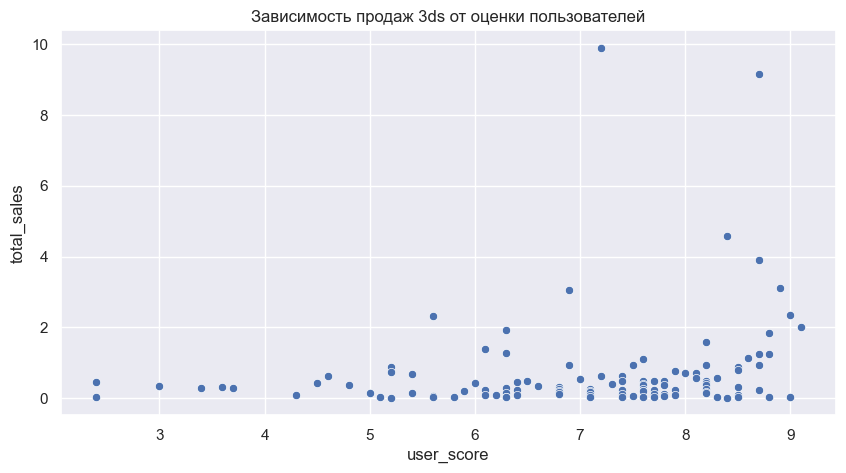

In [97]:
# посмотрим на зависимость user_score и total_sales

sns.scatterplot(x='user_score', y='total_sales', data=ds3).set_title('Зависимость продаж 3ds от оценки пользователей')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

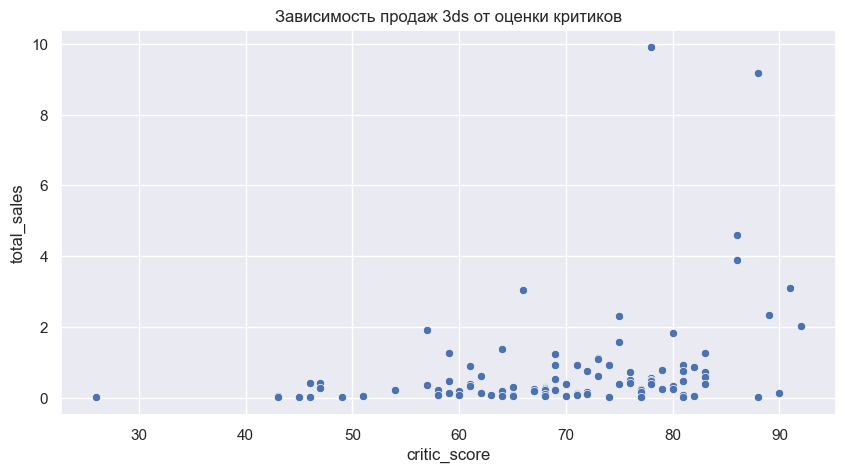

In [98]:
# посмотрим на зависимость critic_score и total_sales

sns.scatterplot(x='critic_score', y='total_sales', data=ds3).set_title('Зависимость продаж 3ds от оценки критиков')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

In [99]:
# посмотрим на корреляцию в цифровом выражении

ds3['user_score'].corr(ds3['total_sales'])

0.1975826341103859

In [100]:
# посмотрим на корреляцию в цифровом выражении

ds3['critic_score'].corr(ds3['total_sales'])

0.3208028695360786

In [101]:
# фильтруем нужную платформу

pc = actual_platforms[actual_platforms['platform']=='pc']

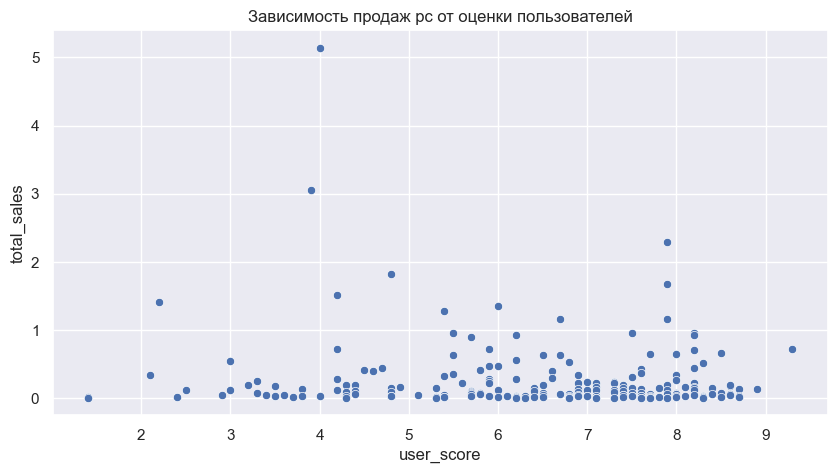

In [102]:
# посмотрим на зависимость user_score и total_sales

sns.scatterplot(x='user_score', y='total_sales', data=pc).set_title('Зависимость продаж pc от оценки пользователей')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

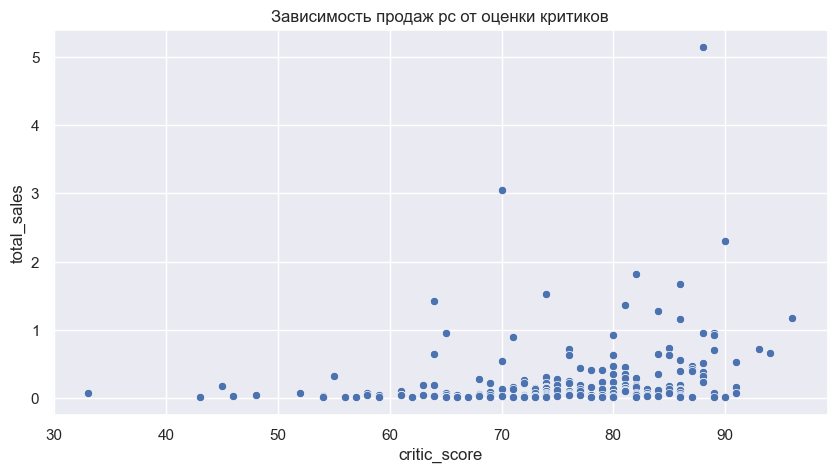

In [103]:
# посмотрим на зависимость critic_score и total_sales

sns.scatterplot(x='critic_score', y='total_sales', data=pc).set_title('Зависимость продаж pc от оценки критиков')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

In [104]:
# посмотрим на корреляцию в цифровом выражении

pc['user_score'].corr(pc['total_sales'])

-0.12186747630735571

In [105]:
# посмотрим на корреляцию в цифровом выражении

pc['critic_score'].corr(pc['total_sales'])

0.23724324311567896

In [106]:
# фильтруем нужную платформу

wiiu = actual_platforms[actual_platforms['platform']=='wiiu']

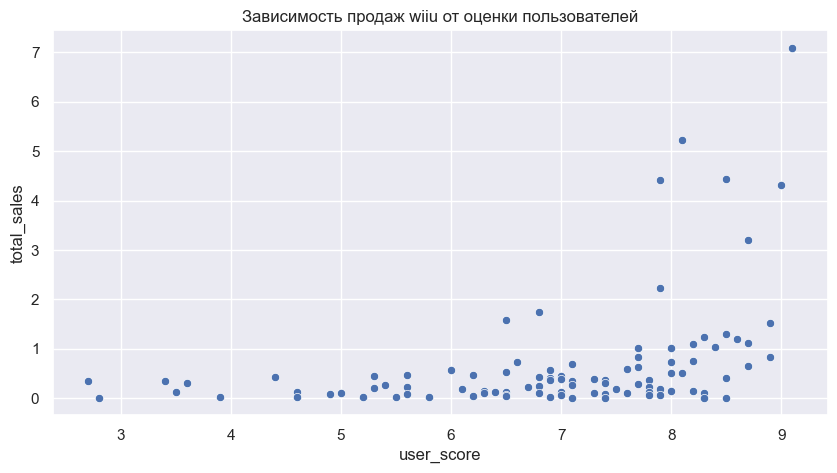

In [107]:
# посмотрим на зависимость user_score и total_sales

sns.scatterplot(x='user_score', y='total_sales', data=wiiu).\
set_title('Зависимость продаж wiiu от оценки пользователей')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

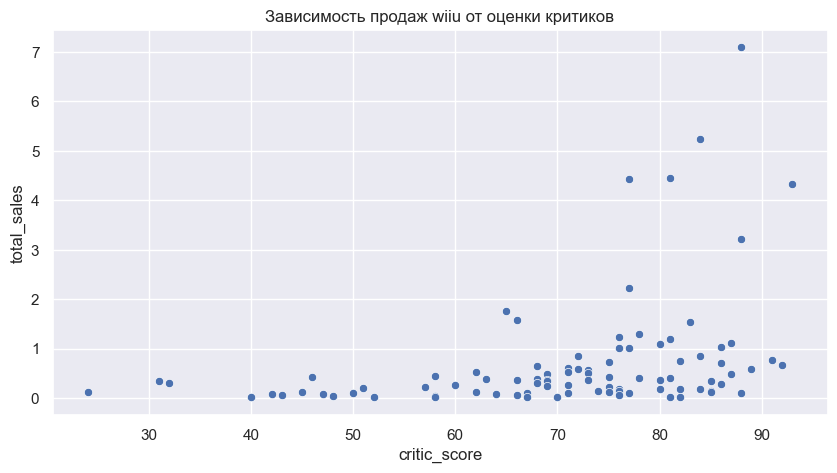

In [108]:
# посмотрим на зависимость critic_score и total_sales

sns.scatterplot(x='critic_score', y='total_sales', data=wiiu).set_title('Зависимость продаж wiiu от оценки критиков')
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

In [109]:
# посмотрим на корреляцию в цифровом выражении

wiiu['user_score'].corr(wiiu['total_sales'])

0.4002190202148619

In [110]:
# посмотрим на корреляцию в цифровом выражении

wiiu['critic_score'].corr(wiiu['total_sales'])

0.3483797601201749

    
- зависимость продаж от critic_score и user_score у платформ xone, ps4, 3ds, pc - примерно одинаковая:
  практически нет зависимости от user_score (от -0.12 до 0.19) и незначительная от critic_score (0.23-0.41)
    
- зависимость продаж от critic_score и user_score у платформы wiiu:
  незначительная от user_score (0.4) и незначительная от critic_score (0.34)
    
- critic_score ещё может незначительно повлиять на продажи, user_score - нет. 

#### смотрим на общее распределение игр по жанрам

In [111]:
# построим сводную таблицу

table_e = actual_platforms.groupby('genre')['total_sales'].agg(['count', 'sum', 'median'])
table_e

,count,sum,median
genre,,,
action,1031,441.12,0.120
adventure,302,29.43,0.030
fighting,109,44.49,0.130
misc,192,85.04,0.120
platform,85,61.00,0.210
puzzle,28,4.89,0.045
racing,115,53.50,0.140
role-playing,370,192.80,0.140
shooter,235,304.73,0.440


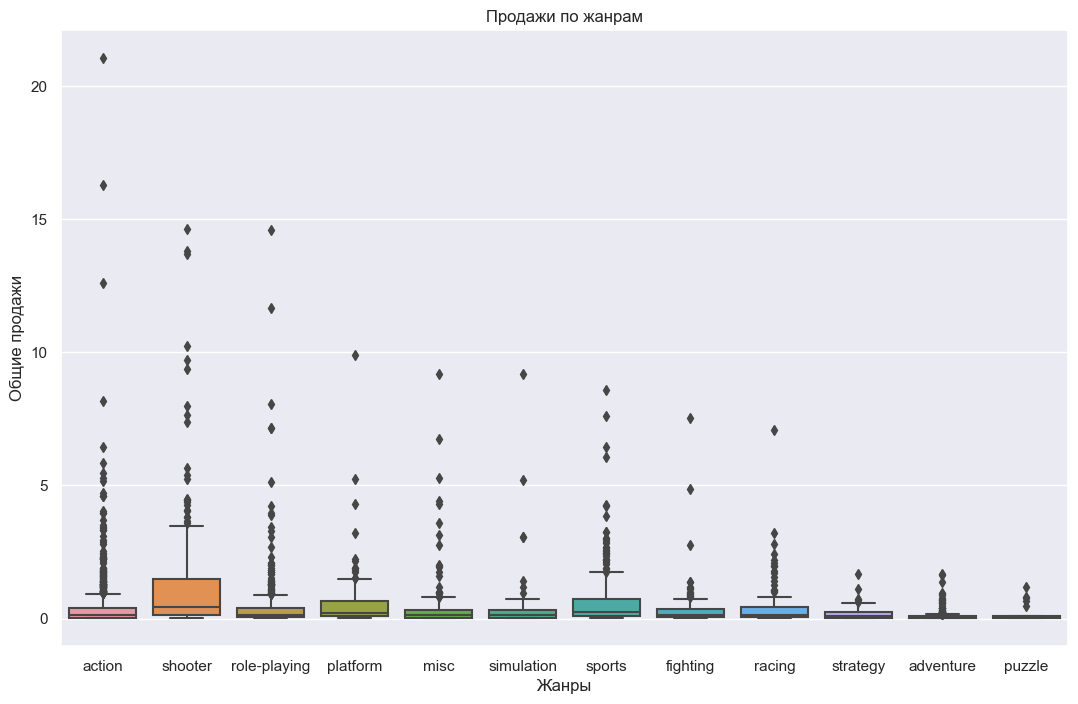

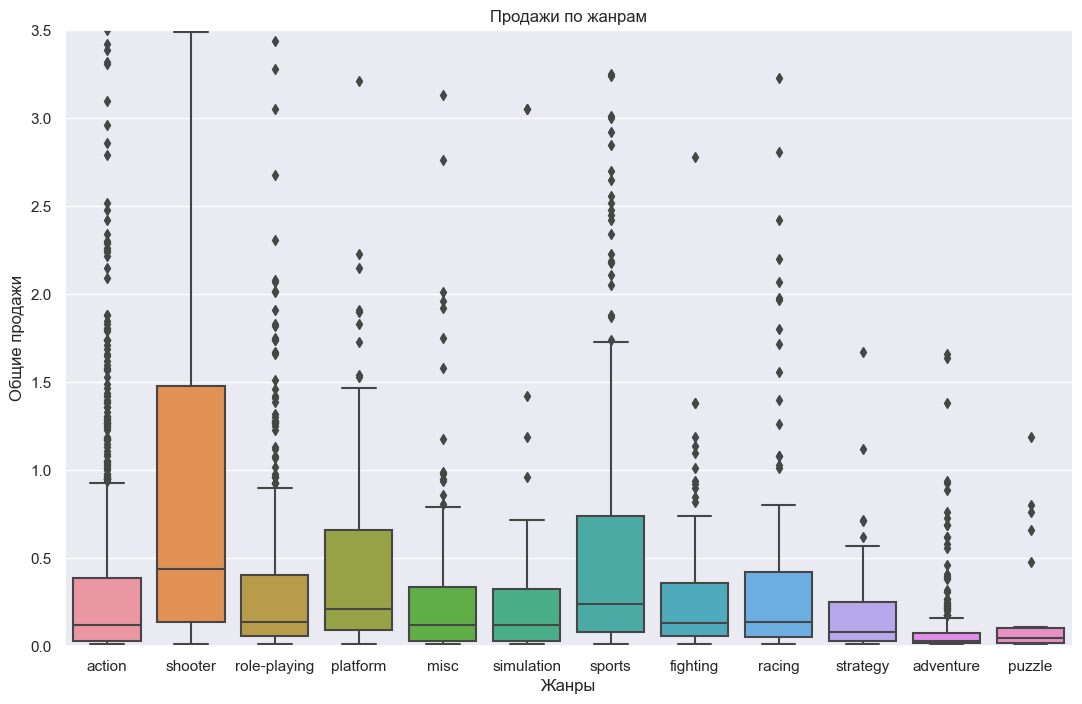

In [112]:
# посмотрим на графики

import seaborn as sns
data_temp, y = actual_platforms.copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()


Самые прибыльные жанры shooter, sports, platform.
Наименее прибыльные adventure, puzzle, strategy.


**Вывод**
    
1. Количество выпускаемых игр
- с 1994 начинается заметный рост, достигая пика в 2008-2009 гг;

- с 2011 года резкое падение, практически в 2 раза, возможно связанное с насыщением рынка игр;

- с 2012 по 2016 - значения +/- на стабильном уровне.
    
2. Жизненный цикл продукта

Если говорить о топовых платформах с максимальными продажами, то их жизненный цикл составляет примерно 11-12 лет.
Далее жизненный цикл сокращается.

3. Лидеры на 2016 год (данные за год неполные)

- лидируют по продажам на 2016 год (данные за 2016 год неполные) ps4 и xone;
- у всех 11 действующих платформ тренд по продажам нисходящий.
    

4. Особенности диаграмм размаха по глобальным продажам в разбивке по платформам
- самый большой разброс у x360 и ps4;
- самое большое значение медианы у x360 (0.31), далее wiiu и xone (0.22), замыкают пятерку ps3 и ps4 (0.2);
- max значение у ps3 - 21.05;
- медиана и среднее значительно отличаются у всех платформ;
- у всех диаграмм медиана расположена ближе к Q1, чем к Q3.
    
5. Корреляция (взаимосвязи)
    
Текущий лидер
- очень слабая отрицательная зависимость продаж от оценки пользователей;
- есть незначительная зависимость продаж от оценки критиков.

Топ-5 с 2012 по 2016 гг
    
- зависимость продаж от critic_score и user_score у платформ xone, ps4, 3ds, pc - примерно одинаковая:
  практически нет зависимости от user_score (от -0.12 до 0.19) и незначительная от critic_score (0.23-0.41)
    
- зависимость продаж от critic_score и user_score у платформы wiiu:
  незначительная от user_score (0.4) и незначительная от critic_score (0.34)
    
- critic_score ещё может незначительно повлиять на продажи, user_score - нет.

6. Лидеры по продажам в разбивке по жанрам  
- самые прибыльные жанры shooter, sports, platform;
- наименее прибыльные adventure, puzzle, strategy.

### Портрет пользователя каждого региона

#### cамые популярные платформы (топ-5)

In [113]:
# построим сводную таблицу для na

table_f = actual_platforms.pivot_table(index='platform',values=['na_sales','total_sales'],aggfunc=('sum'))\
               .sort_values(by='na_sales',ascending=False).head()
table_f

,na_sales,total_sales
platform,,
x360,140.05,236.54
ps4,108.74,314.14
ps3,103.38,288.79
xone,93.12,159.32
3ds,55.31,194.61


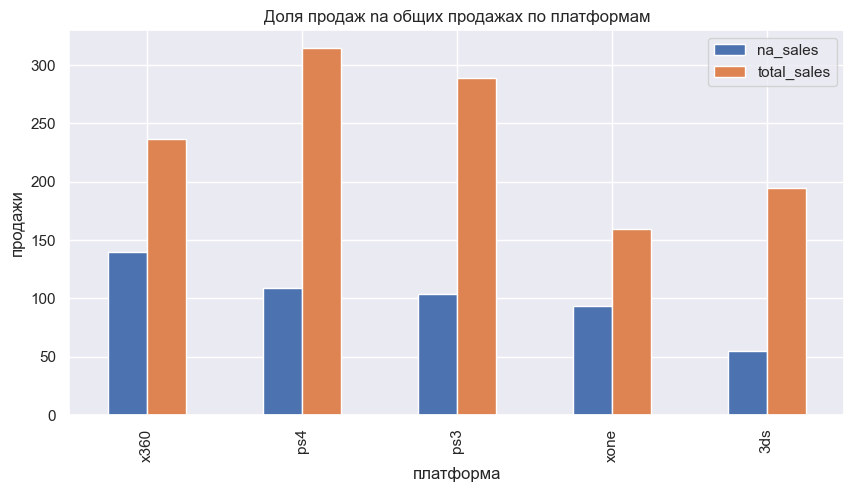

In [148]:
table_f.plot(kind='bar')
plt.title('Доля продаж na общих продажах по платформам')
plt.ylabel('продажи')
plt.xlabel('платформа')
plt.show()

In [115]:
# построим сводную таблицу для eu

table_g = actual_platforms.pivot_table(index='platform',values=['eu_sales','total_sales'],aggfunc=('sum'))\
               .sort_values(by='eu_sales',ascending=False).head()
table_g

,eu_sales,total_sales
platform,,
ps4,141.09,314.14
ps3,106.86,288.79
x360,74.52,236.54
xone,51.59,159.32
3ds,42.64,194.61


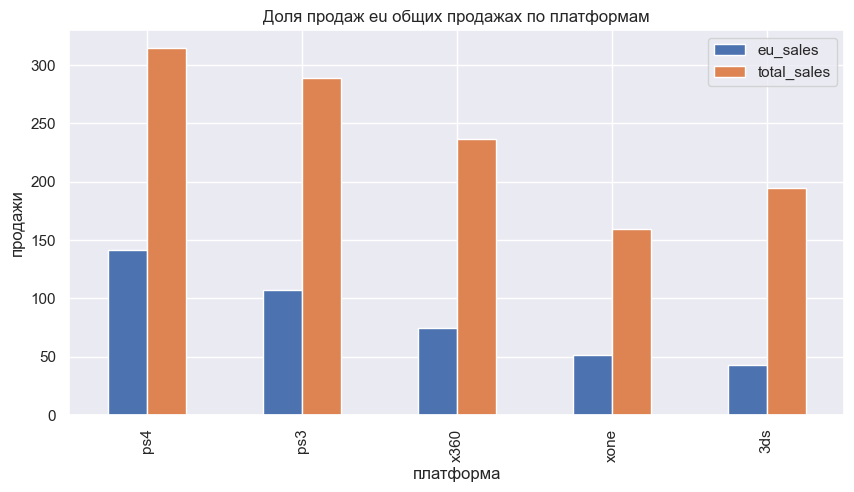

In [149]:
table_g.plot(kind='bar')
plt.title('Доля продаж eu общих продажах по платформам')
plt.ylabel('продажи')
plt.xlabel('платформа')
plt.show()

In [117]:
# построим сводную таблицу для jp

table_h = actual_platforms.pivot_table(index='platform',values=['jp_sales','total_sales'],aggfunc=('sum'))\
               .sort_values(by='jp_sales',ascending=False).head()
table_h

,jp_sales,total_sales
platform,,
3ds,87.79,194.61
ps3,35.29,288.79
psv,21.04,49.18
ps4,15.96,314.14
wiiu,13.01,82.19


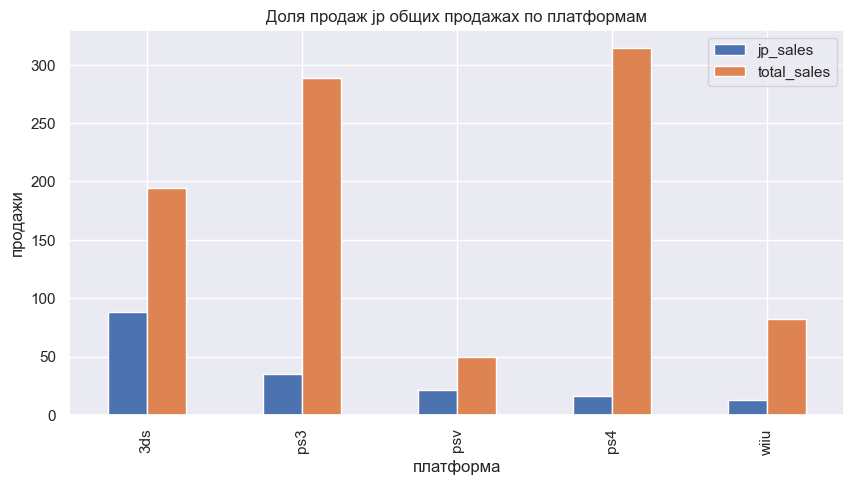

In [150]:
table_h.plot(kind='bar')
plt.title('Доля продаж jp общих продажах по платформам')
plt.ylabel('продажи')
plt.xlabel('платформа')
plt.show()

    
- платформы ps4, ps3, 3ds входят в топ-5 в каждом регионе (na, eu, jr); 
    
- топ-5 в eu и na идентичен, с разным объемом продаж;
    
- более 1/2 продаж x360 приходится на na, более 1/3 продаж ps3, xone, ps4, приходятся на na;
    
- чуть менее 1/2 продаж ps4 приходится на eu, чуть менее 1/3 продаж ps3, x360, xone приходятся на eu;
    
- чуть менее 1/2 продаж 3ds и psv приходятся на jr.

#### самые популярные жанры (топ-5)

In [119]:
# построим сводную таблицу для na

table_i = actual_platforms.pivot_table(index='genre',values=['na_sales','total_sales'],aggfunc=('sum'))\
               .sort_values(by='na_sales',ascending=False).head()
table_i

,na_sales,total_sales
genre,,
action,177.84,441.12
shooter,144.77,304.73
sports,81.53,181.07
role-playing,64.00,192.80
misc,38.19,85.04


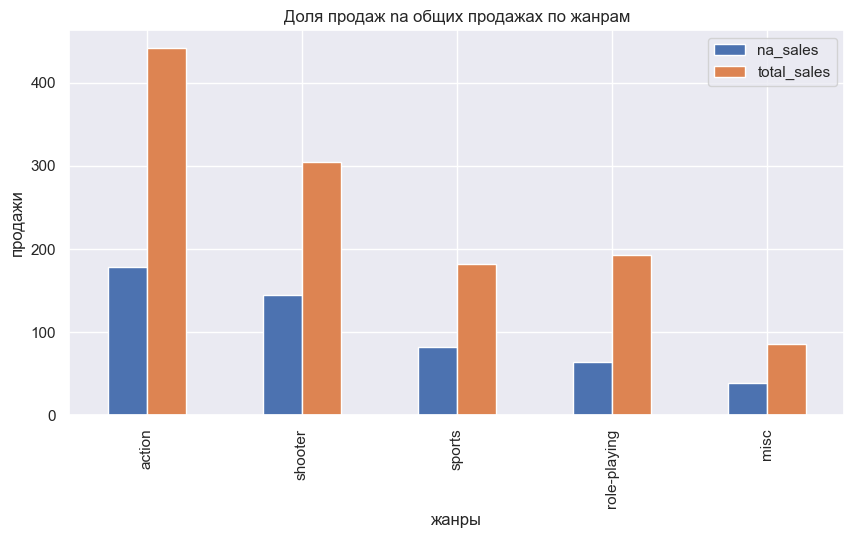

In [154]:
table_i.plot(kind='bar')
plt.title('Доля продаж na общих продажах по жанрам')
plt.ylabel('продажи')
plt.xlabel('жанры')
plt.show()

In [121]:
# построим сводную таблицу для eu

table_j = actual_platforms.pivot_table(index='genre',values=['eu_sales','total_sales'],aggfunc=('sum'))\
               .sort_values(by='eu_sales',ascending=False).head()
table_j

,eu_sales,total_sales
genre,,
action,159.34,441.12
shooter,113.47,304.73
sports,69.09,181.07
role-playing,48.53,192.80
racing,27.29,53.50


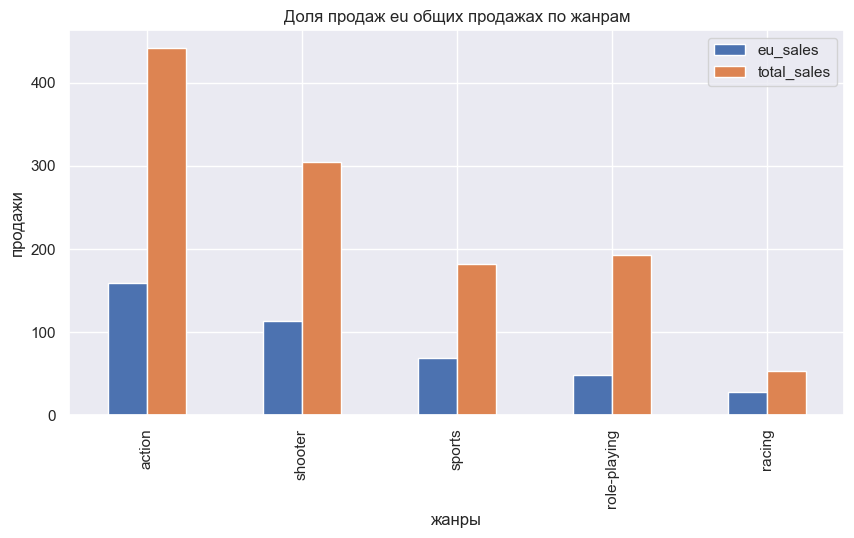

In [155]:
table_j.plot(kind='bar')
plt.title('Доля продаж eu общих продажах по жанрам')
plt.ylabel('продажи')
plt.xlabel('жанры')
plt.show()

In [123]:
# построим сводную таблицу для jp

table_k = actual_platforms.pivot_table(index='genre',values=['jp_sales','total_sales'],aggfunc=('sum'))\
               .sort_values(by='jp_sales',ascending=False).head()
table_k

,jp_sales,total_sales
genre,,
role-playing,65.44,192.80
action,52.80,441.12
misc,12.86,85.04
simulation,10.41,35.12
fighting,9.44,44.49


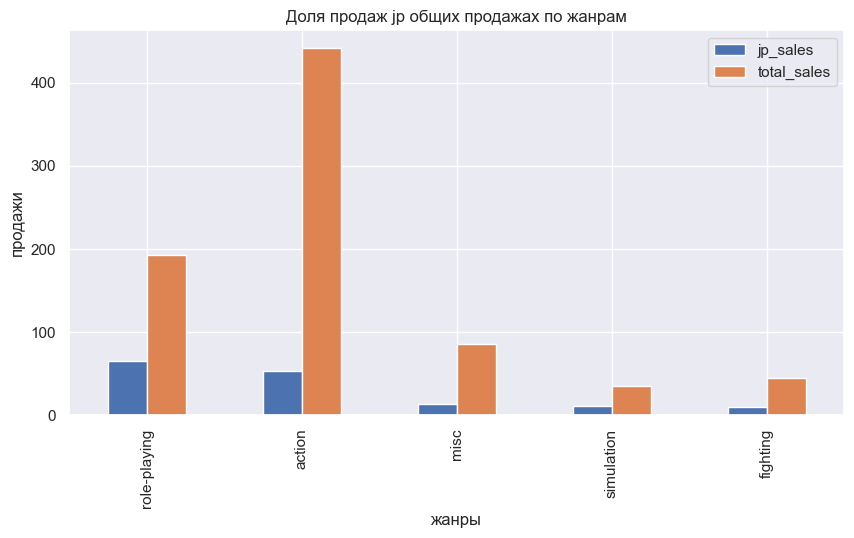

In [156]:
table_k.plot(kind='bar')
plt.title('Доля продаж jp общих продажах по жанрам')
plt.ylabel('продажи')
plt.xlabel('жанры')
plt.show()


- жанры action, role-playing входят в топ-5 во всех регионах;
- наиболее популярные жанры в na и eu практически идентичны (первые 4 места в топе);
- в jr на первом месте role-playing, далее также как и в na и eu action.
- shooter более популярны в eu и na, чем в jp.

#### влияет ли рейтинг ESRB на продажи в отдельном регионе

In [125]:
# посмотрим на топ возрастных категорий в na

table_l = actual_platforms.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))\
               .sort_values(by='na_sales',ascending=False)
table_l

,na_sales
rating,
M,231.57
E,114.37
unknown,103.31
E10+,75.70
T,66.02


In [126]:
# посмотрим на топ возрастных категорий в eu

table_m = actual_platforms.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))\
               .sort_values(by='eu_sales',ascending=False)
table_m

,eu_sales
rating,
M,193.96
E,113.03
unknown,91.50
E10+,55.37
T,52.96


In [127]:
# посмотрим на топ возрастных категорий в eu

table_n = actual_platforms.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))\
               .sort_values(by='jp_sales',ascending=False)
table_n

,jp_sales
rating,
unknown,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


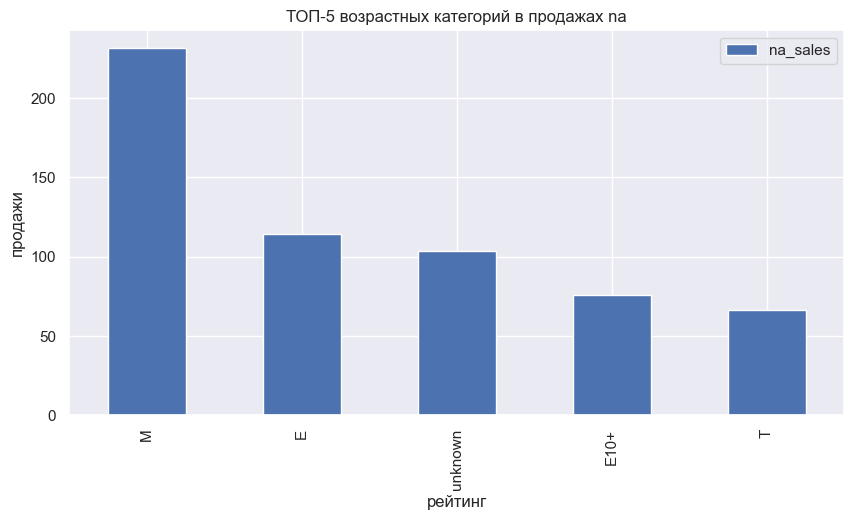

In [159]:
# посмотрим на визуализацию na

table_l.plot(kind='bar')
plt.title('ТОП-5 возрастных категорий в продажах na')
plt.ylabel('продажи')
plt.xlabel('рейтинг')
plt.show()

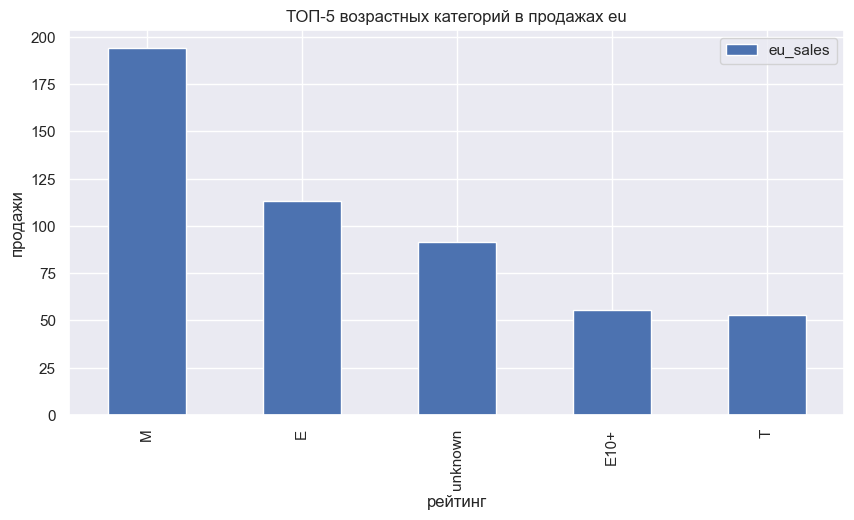

In [160]:
# посмотрим на визуализацию eu

table_m.plot(kind='bar')
plt.title('ТОП-5 возрастных категорий в продажах eu')
plt.ylabel('продажи')
plt.xlabel('рейтинг')
plt.show()

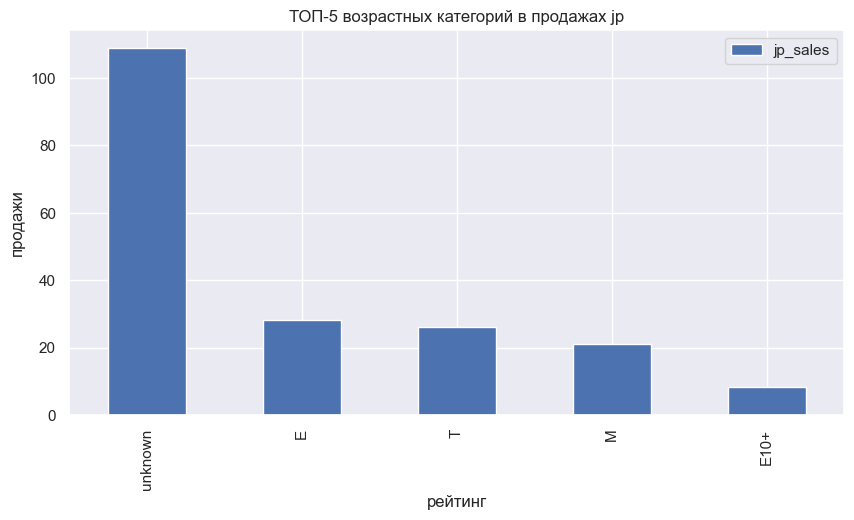

In [161]:
# посмотрим на визуализацию jr

table_n.plot(kind='bar')
plt.title('ТОП-5 возрастных категорий в продажах jp')
plt.ylabel('продажи')
plt.xlabel('рейтинг')
plt.show()


- в na и eu топ-5 идентичны (М, E, unknown, E10+, T);
  То есть это возрастные категории для взрослых, для всех, 'unknown', для всех старше 10 лет, подростки.
  При создании рекламной компании не стоит целенаправленно ориентироваться на детей старше 10 лет и подростков, а скорее ориентироваться на всех любителей видеоигр.
    
- в jr ESRB рейтинг не заполняется, поэтому на первом месте 'unknown';

- если бы последовательность возрастных категорий были бы идентичны во всех регионах, то можно было бы утверждать что рейтинг ESRB не влияет. Но в нашем случае это не так. К тому же, выпуская такой продукт как видеоигры, считаю, в любом случае нужно учитывать возрастную категорию.
    


**Вывод**

1. регион NA
    
- использует платформы: x360, ps4, ps3, xone, 3ds
- предпочитает жанры: action, shooter, sports, role-playing, misc
- основные возрастные категории: для взрослых, для всех
    
2. регион EU
- использует платформы: ps4, ps3, x360, xone, 3ds
- предпочитает жанры: action, shooter, sports, role-playing, racing
- основные возрастные категории: для взрослых, для всех   

3. регион JP
    
- использует платформы: 3ds, ps3, psv, ps4, wiiu
- предпочитает жанры: role-playing, action, misc, simulation, fighting
- основные возрастные категории: не определена (unknown, для всех, для подростков)  
    
Кроме вышеперечисленного, что удалось выяснить:
    
- платформы ps4, ps3, 3ds входят в топ-5 в каждом регионе (na, eu, jr);
- топ-5 в eu и na идентичен, с разным объемом продаж;
- в na больше всего популярна платформа x360, в eu  - ps4, в jp - 3ds;    
- жанры action, role-playing входят в топ-5 во всех регионах;
- наиболее популярные жанры в na и eu практически идентичны (первые 4 места в топе);
- в jr на первом месте role-playing, далее также как и в na и eu action.
- shooter более популярны в eu и na, чем в jp
- если бы последовательность возрастных категорий были бы идентичны во всех регионах, то можно было бы утверждать что рейтинг ESRB не влияет. Но в нашем случае это не так. К тому же, выпуская такой продукт как видеоигры, считаю, в любом случае нужно учитывать возрастную категорию.
    

### Проверка гипотез

#### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Cформулируем нулевую и альтернативную гипотезы, определим alpha:

H_0: Средний пользовательский рейтинг платформы Xbox = средний пользовательский рейтинг платформы PC

H_a: Средний пользовательский рейтинг платформы Xbox ≠ средний пользовательский рейтинг платформы РС

alpha = 0.05

In [131]:
# напомним актуальный период

actual_platforms = df[df['year_of_release'] >= 2012]

In [132]:
# выбираем строки без пропусков 

actual_platforms = actual_platforms[actual_platforms['user_score'].notna()]

In [133]:
# посмотрим на значения в столбце

actual_platforms['platform'].unique()

array(['ps3', 'x360', 'ps4', '3ds', 'wiiu', 'wii', 'xone', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

In [134]:
# сначала выборка по платформам

actual_xone = actual_platforms[actual_platforms['platform'] == 'xone']
actual_pc = actual_platforms[actual_platforms['platform'] == 'pc']

In [135]:
sample_1 = actual_xone['user_score']
sample_2 = actual_pc['user_score']


results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


#### Проверка гипотезы: средние пользовательские рейтинги жанров action и sports разные

Cформулируем нулевую и альтернативную гипотезы, определим alpha:

H_0: Средний пользовательский рейтинг жанра action = средний пользовательский рейтинг жанра sports

H_a: Средний пользовательский рейтинг жанра action ≠ средний пользовательский рейтинг жанра sports

alpha = 0.05

In [136]:
# выбираем строки без пропусков 

actual_platforms = actual_platforms[actual_platforms['genre'].notna()]

In [137]:
# посмотрим на значения в столбце

actual_platforms['genre'].unique()

array(['action', 'shooter', 'platform', 'simulation', 'sports',
       'role-playing', 'racing', 'misc', 'fighting', 'strategy',
       'adventure', 'puzzle'], dtype=object)

In [138]:
# сначала выборка по платформам

actual_action = actual_platforms[actual_platforms['genre'] == 'action']
actual_sports = actual_platforms[actual_platforms['genre'] == 'sports']

In [139]:
sample_1 = actual_action['user_score']
sample_2 = actual_sports['user_score']


results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу



**Вывод**
    
По первой гипотезе: не получилось отвергнуть нулевую гипотезу (p-value = 0.54)
    
То есть средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
По второй гипотезе: отвергаем нулевую гипотезу (p-value = 4.24307776572644e-20)

То есть средние пользовательские рейтинги жанров action и sports разные.
    
    
Что касается критериев значимости, то я попробовала и с критерием значимости 0.05, и с критерием значимости 0.01 - значения p-value получились одинаковыми.
Критерий значимости определяет насколько критично для нас ошибиться, т.е. насколько значима для нас цена ошибки.
В нашем случае можно было выбрать любой. По идее, бюджет рекламной компании - немалые деньги и лучше не ошибаться.

### Итоговый вывод

  
По итогу проведенного исследования было выявлено следующее:
- бурный рост в данной сфере в прошлом, последние 5 лет рынок стабилен, выпуск игр примено на одном и том же уровне; 
- если говорить о жизненном цикле продукта, то исследуя топовые платформы с максимальными продажами, было выявлено, что жизненный цикл составляет примерно 11-12 лет;
- по итогу 2016 года (данные неполные) лидеры ps4 и xone, отстающие wii и x360;
- отсутствует зависимость между объемом продаж и оценкой пользователей;    
- незначительная зависимость между объемом продаж и оценкой критиков;  
- самые прибыльные жанры shooter, sports, platform, наименее прибыльные adventure, puzzle, strategy

Были составлены портреты пользователя для каждого региона:

1. регион NA
    
- использует платформы: x360, ps4, ps3, xone, 3ds
- предпочитает жанры: action, shooter, sports, role-playing, misc
- основные возрастные категории: для взрослых, для всех
    
2. регион EU
- использует платформы: ps4, ps3, x360, xone, 3ds
- предпочитает жанры: action, shooter, sports, role-playing, racing
- основные возрастные категории: для взрослых, для всех   

3. регион JP
    
- использует платформы: 3ds, ps3, psv, ps4, wiiu
- предпочитает жанры: role-playing, action, misc, simulation, fighting
- основные возрастные категории: не определена (unknown, для всех, для подростков)    
      
Кроме того, был проведен статистический анализ с целью подтвердить два предположения:
- предположение, что средний пользовательский рейтинг на продажах не отражается. Предположение подтвердилось.
- предположение, что для среднего пользователя жанры action и sports одинаково популярны. Предположение не подтвердилось.

По итогу проведенного анализа предлагаю сделать ставку на платформы ps4 и xone, жанра action, shooter или  sports.
Регион - EU, ориентироваться на возрастные категории M (для взрослых) и E (для всех).
    
Что касается общей информации по нашим данным:
1. достаточно много пропущенных значений в столбцах critic_score и user_score.
Предполагаю, что пропуски связаны с техническими ошибками. Например, при выгрузке, объединении данных (в столбцах user_score и rating количество пропусков практически одинаковое)
    
2. В первоначальные данные правки вносились по минимуму:
- в столбце user_score было обнаружено значение 'tbd', были заменены на Nan
- в столбце 'rating' заменили пропущенные значения на 'unknown'